In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv("/content/Housing (1).csv")

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df.shape

(545, 13)

In [17]:
corr1 = df.corr()
print(corr1)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<ipython-input-17-85cfae5d3fc2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr()


<Axes: >

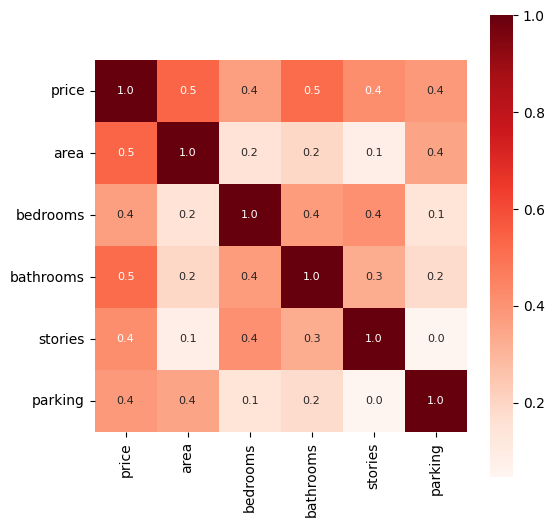

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(corr1,annot=True,cbar=True,cmap='Reds',square=True,fmt='.1f',annot_kws={'size':8})

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
label_encoder = LabelEncoder()

In [21]:
df['mainroad'].unique()
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [22]:
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [24]:
x = df.drop(['price'],axis=1)
y = df['price']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 8)
print(x.shape,x_train.shape,x_test.shape)

(545, 12) (436, 12) (109, 12)


In [26]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [27]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [28]:
model = LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred = model.predict(x_test)
#print(y_pred)

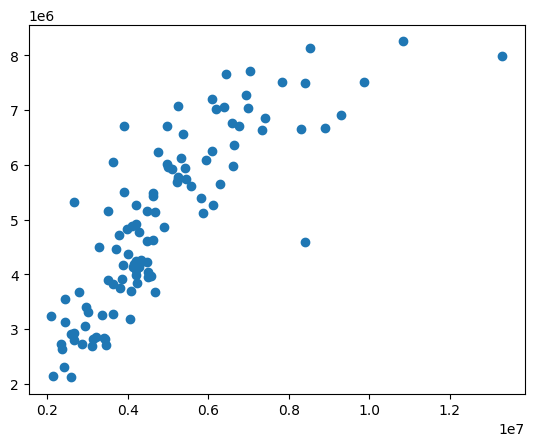

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
model.score(x_test,y_test)

0.6750390176741747